In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('train.csv')

In [3]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 85)

In [5]:
# Understanding the Data Dictionary
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# # Set index as Id column
housing = housing.set_index("Id")
housing.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [7]:
housing.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [8]:
# Treating NA - meaningful missing data
# replacing meaningful NA
# housing.BsmtQual.replace(np.nan,'No Basement', regex=True)
# housing[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].fillna("No Basement", inplace = True)
housing["BsmtQual"].fillna("No_Basement", inplace = True)
housing["BsmtCond"].fillna("No_Basement", inplace = True)
housing["BsmtExposure"].fillna("No_Basement", inplace = True)
housing["BsmtFinType1"].fillna("No_Basement", inplace = True)
housing["BsmtFinType2"].fillna("No_Basement", inplace = True)

In [9]:
housing.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'No_Basement'], dtype=object)

In [10]:
# Similarly replacing NA in other columns with meaningful values
housing["FireplaceQu"].fillna("No_Fireplace", inplace = True)
housing["GarageType"].fillna("No_Garage", inplace = True)
housing["GarageFinish"].fillna("No_Garage", inplace = True)
housing["GarageQual"].fillna("No_Garage", inplace = True)
housing["GarageCond"].fillna("No_Garage", inplace = True)
housing["PoolQC"].fillna("No_Pool", inplace = True)
housing["Fence"].fillna("No_Fence", inplace = True)
housing["MiscFeature"].fillna("No_Feature", inplace = True)
housing["Alley"].fillna("No_alley_access", inplace = True)

In [11]:
housing.MiscFeature.unique()

array(['No_Feature', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [12]:
# Get the percentages of null value
null_percentage = housing.isnull().sum()/housing.shape[0]*100
null_percentage

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [13]:
# if the null value % 20 or > 20 so need to drop it
col_for_drop = null_percentage[null_percentage > 20].keys() 

In [14]:
# drop columns
housing = housing.drop(col_for_drop, "columns")
housing.shape

(1460, 80)

In [15]:
housing.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [16]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [17]:
# Fill na values
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].mean())
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean())
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean())
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])

In [18]:
housing.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [19]:
# Plotting Continuous variables with respect to dependent variable(y)
housing_numeric_first_half = housing.loc[:,['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'SalePrice']]
housing_numeric_second_half = housing.loc[:,['1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'SalePrice']]
# housing_numeric_first_half
housing_numeric_third_half = housing.loc[:,['KitchenAbvGr', 'TotRmsAbvGrd', 'BsmtUnfSF', 'TotalBsmtSF',
                                            'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                                            'OpenPorchSF', 'SalePrice']]
housing_numeric_fourth_half = housing.loc[:,['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
housing_numeric_second_half

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
Id,,,,,,,,,,
1,856,854,0,1710,1,0,2,1,3,208500
2,1262,0,0,1262,0,1,2,0,3,181500
3,920,866,0,1786,1,0,2,1,3,223500
4,961,756,0,1717,1,0,1,0,3,140000
5,1145,1053,0,2198,1,0,2,1,4,250000
...,...,...,...,...,...,...,...,...,...,...
1456,953,694,0,1647,0,0,2,1,3,175000
1457,2073,0,0,2073,1,0,2,0,3,210000
1458,1188,1152,0,2340,0,0,2,0,4,266500


<Figure size 2160x1440 with 0 Axes>

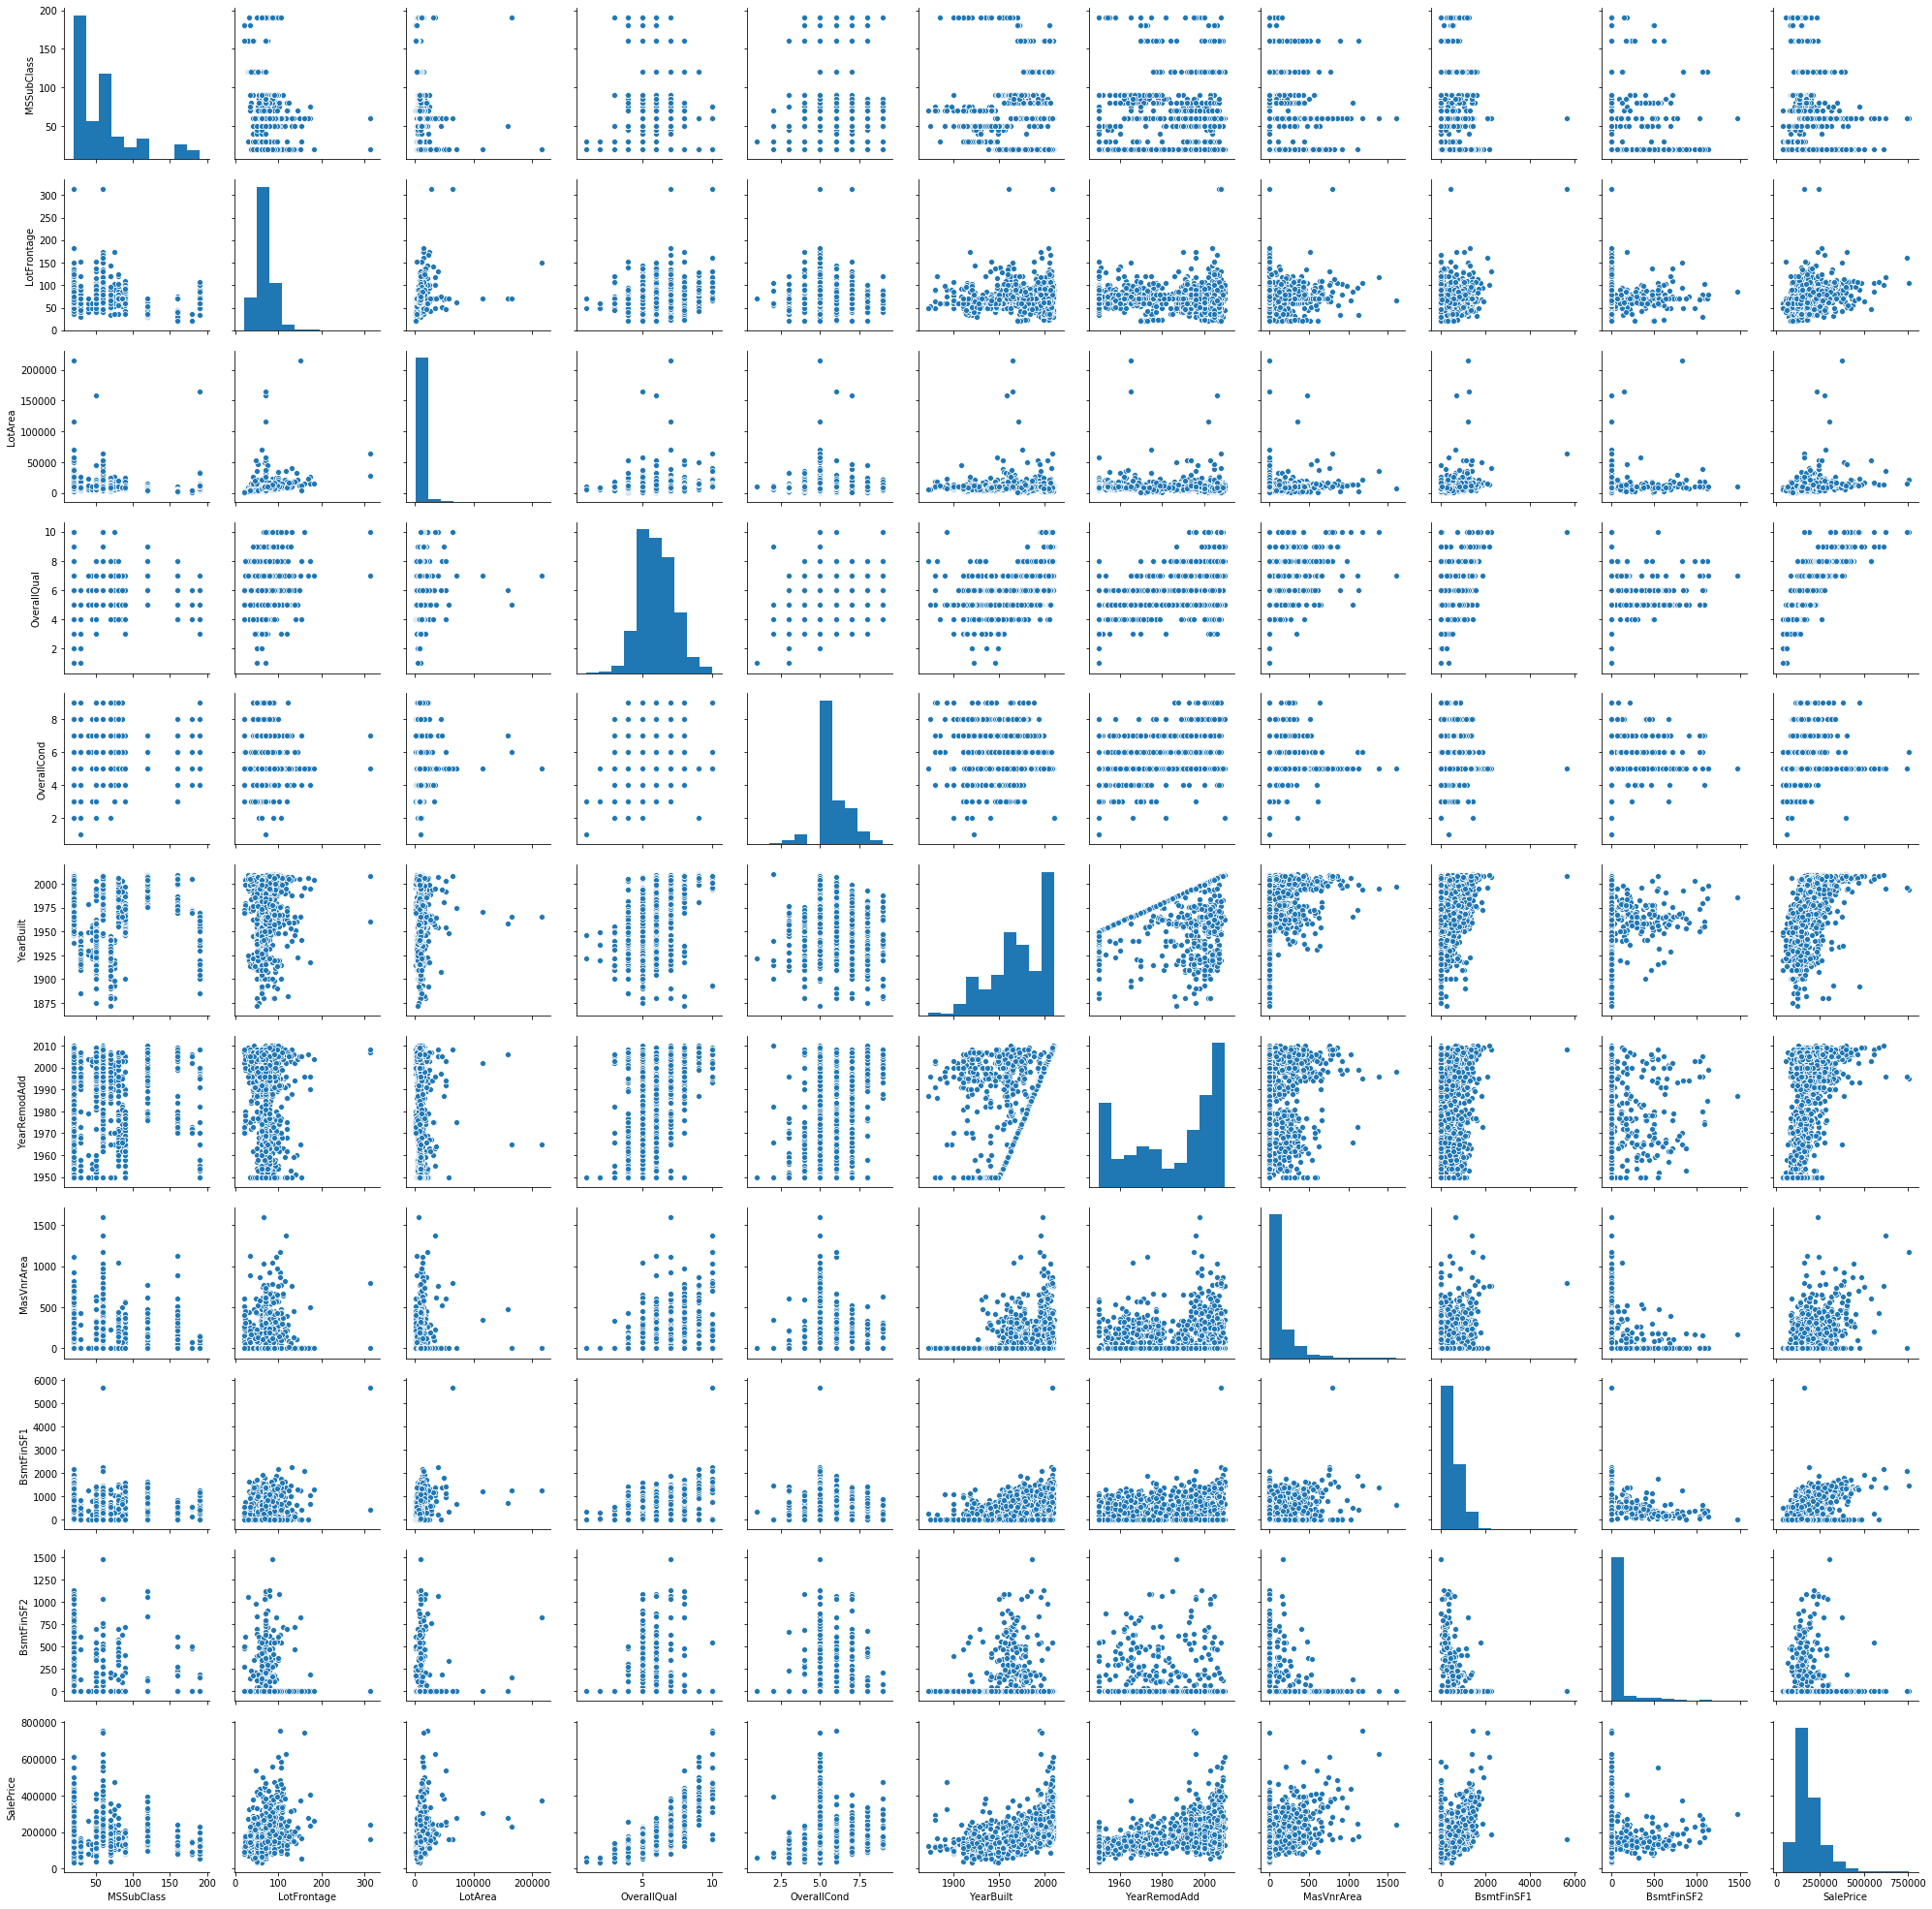

In [20]:
# paiwise scatter plot

plt.figure(figsize=(30, 20))
sns.pairplot(housing_numeric_first_half)
plt.show()

<Figure size 2160x1440 with 0 Axes>

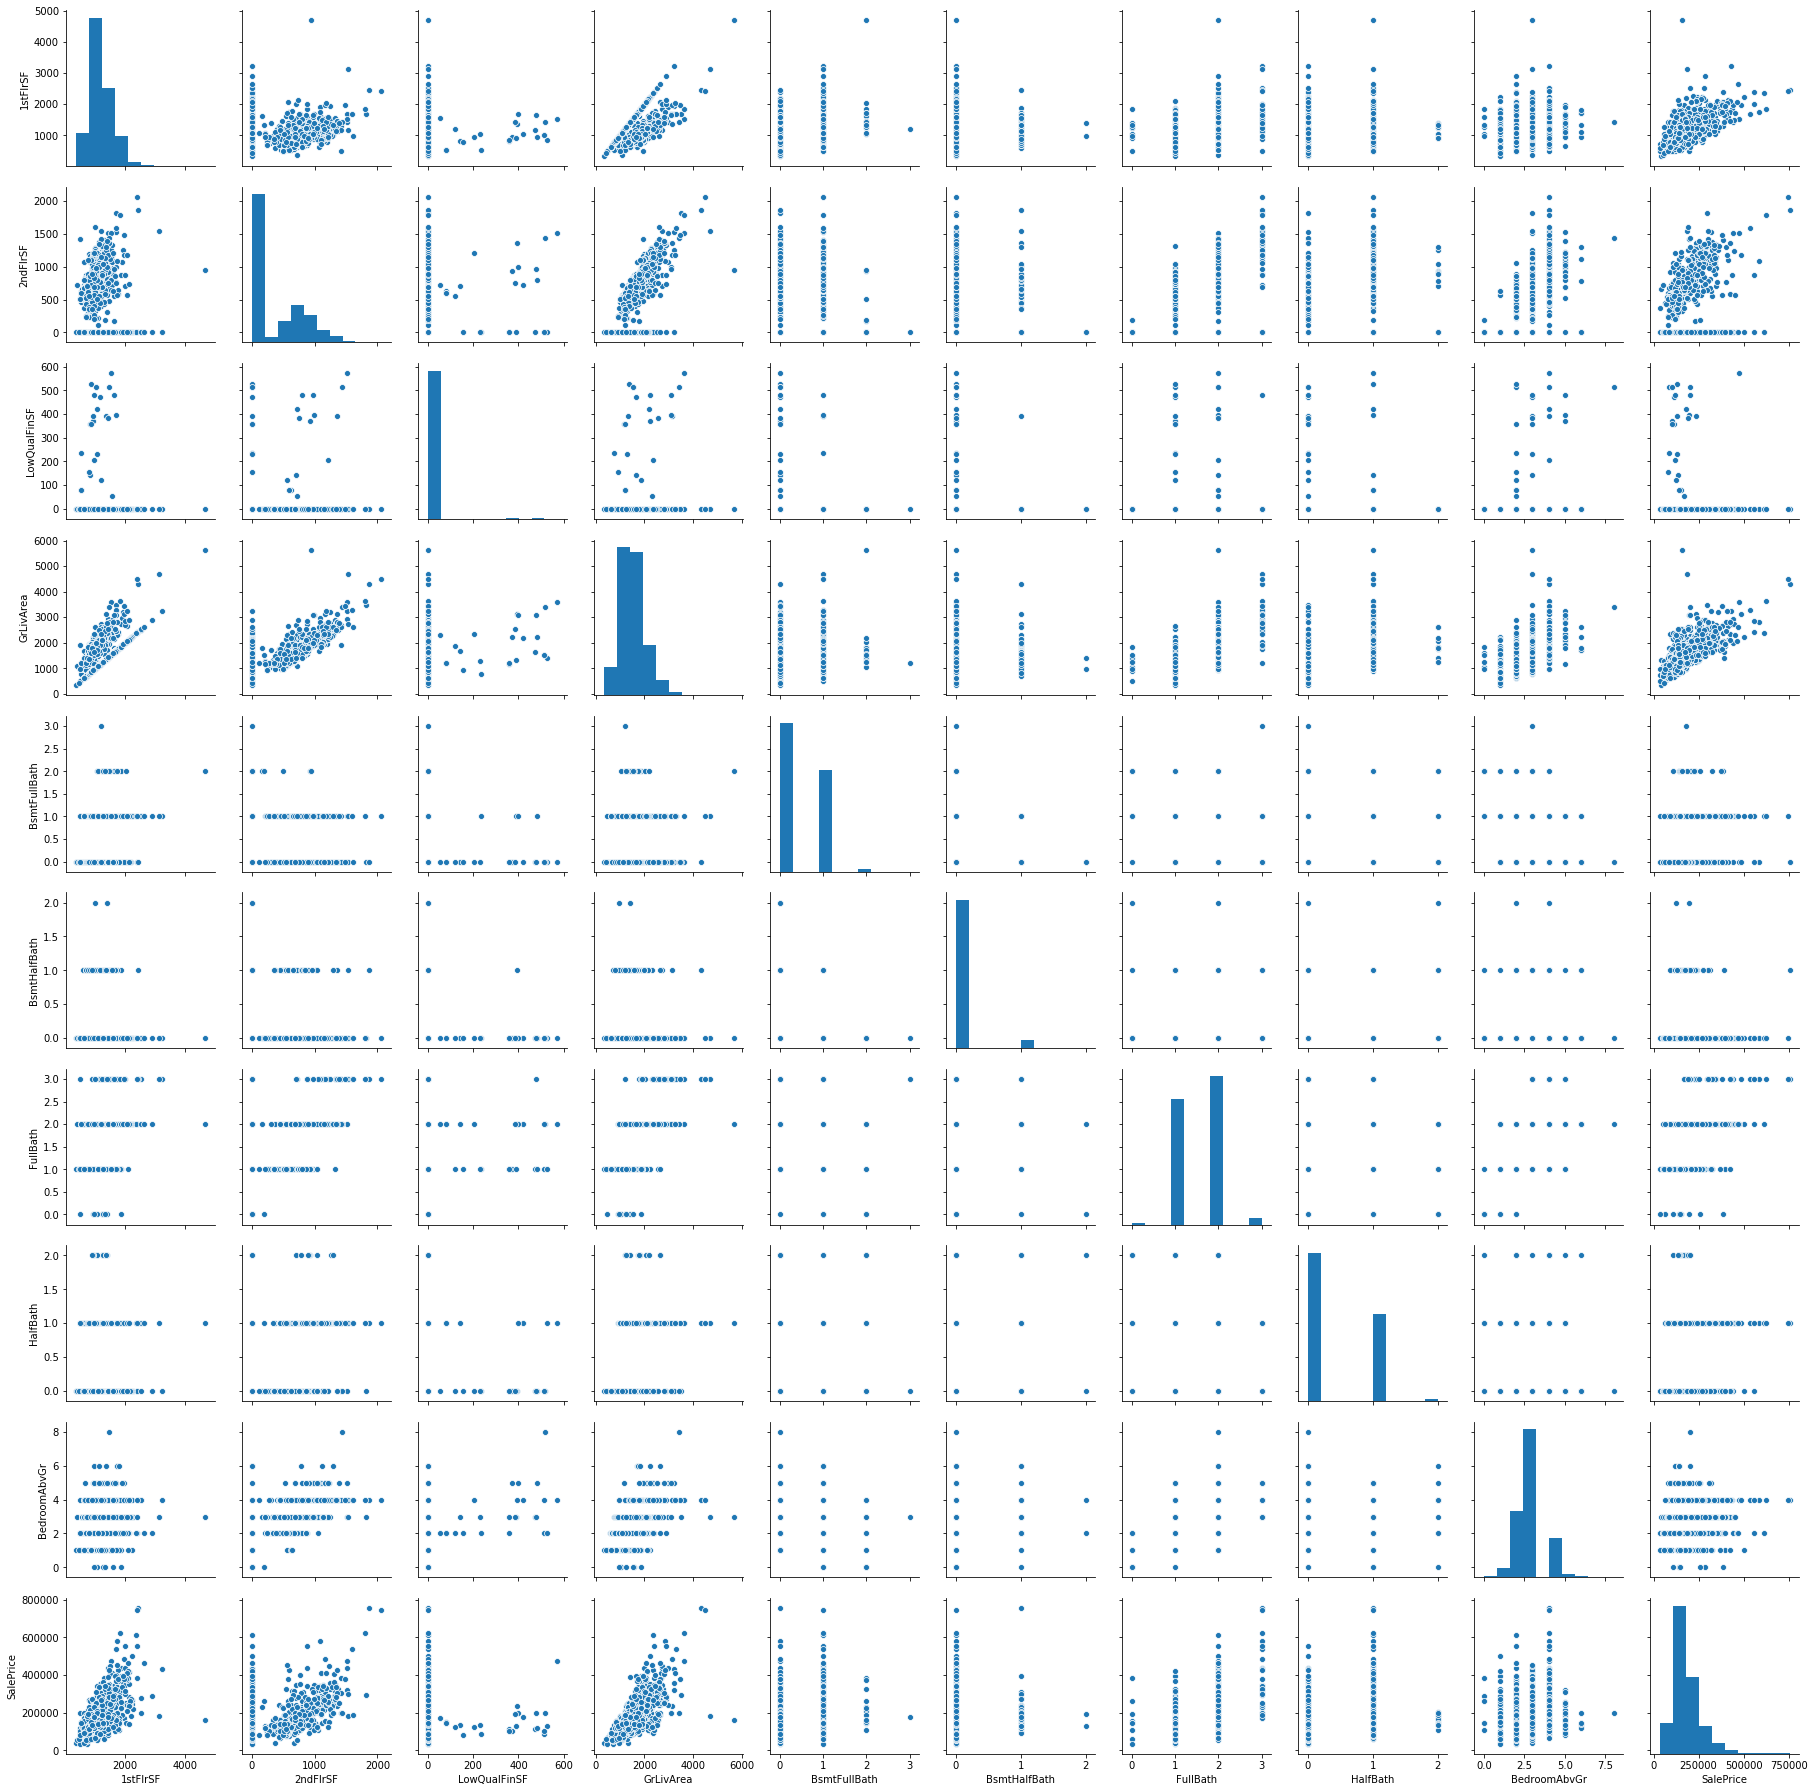

In [21]:
plt.figure(figsize=(30, 20))
sns.pairplot(housing_numeric_second_half)
plt.show()

<Figure size 2160x1440 with 0 Axes>

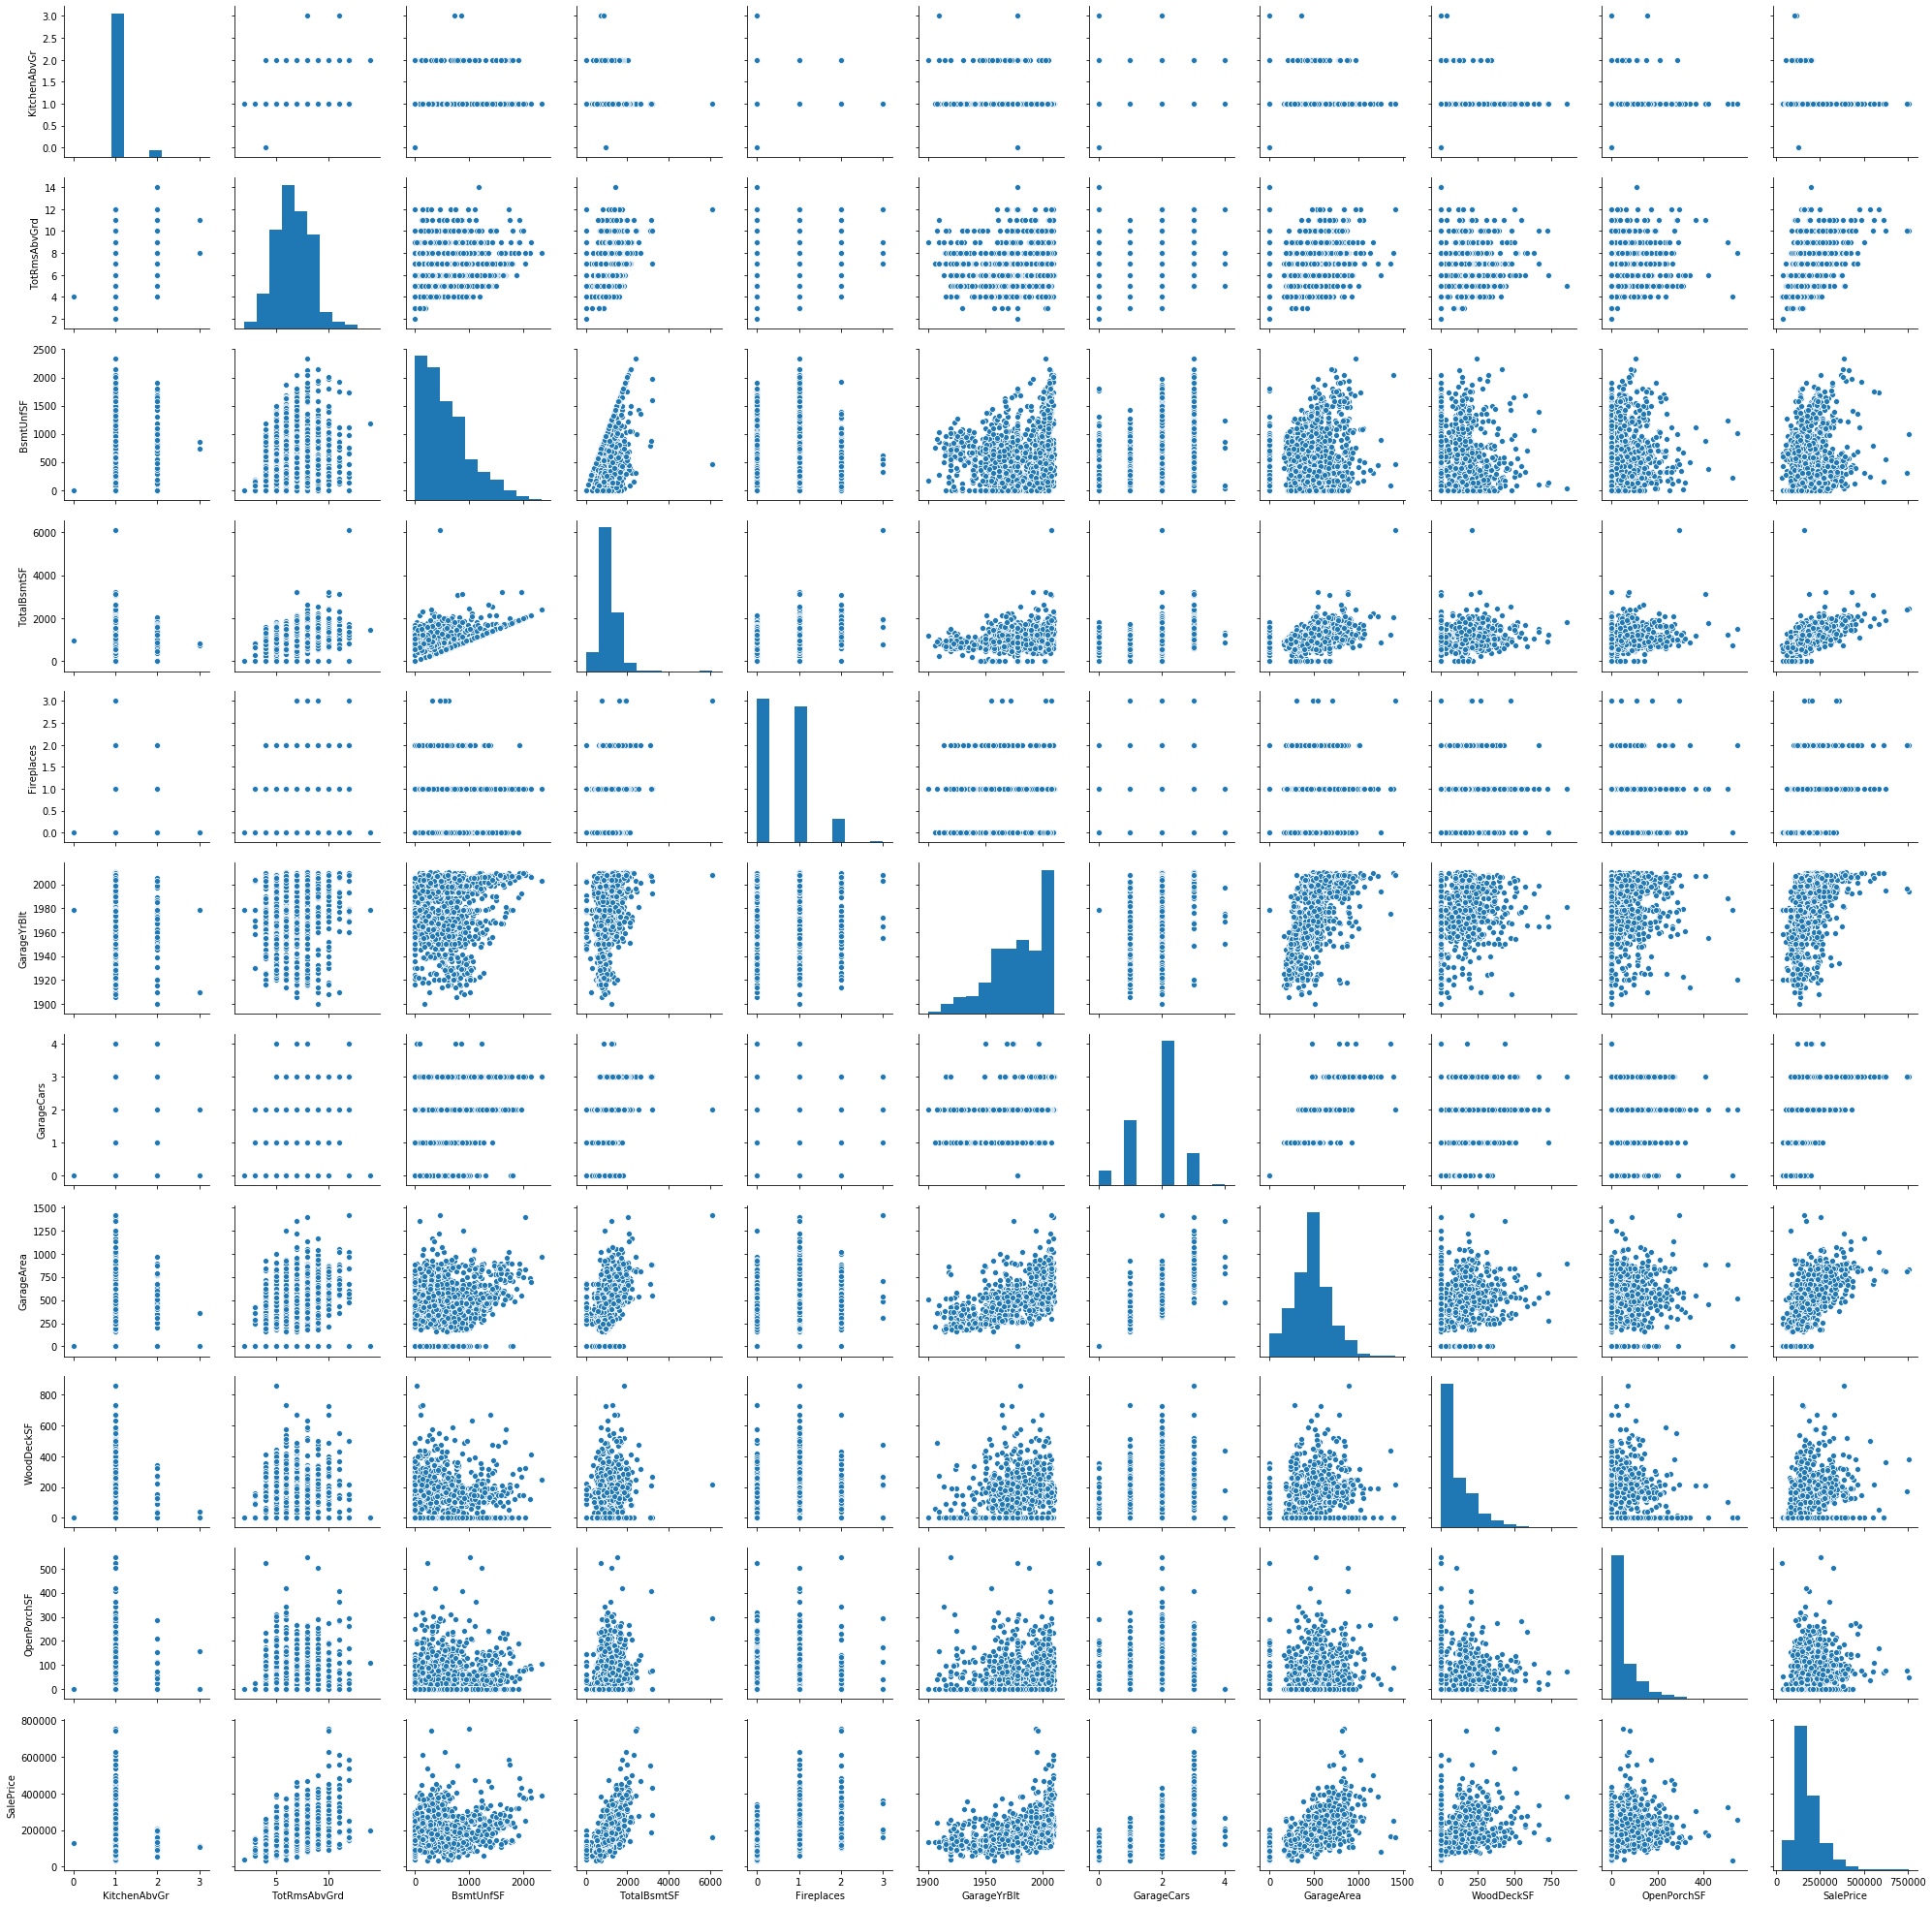

In [22]:
plt.figure(figsize=(30, 20))
sns.pairplot(housing_numeric_third_half)
plt.show()

<Figure size 2160x1440 with 0 Axes>

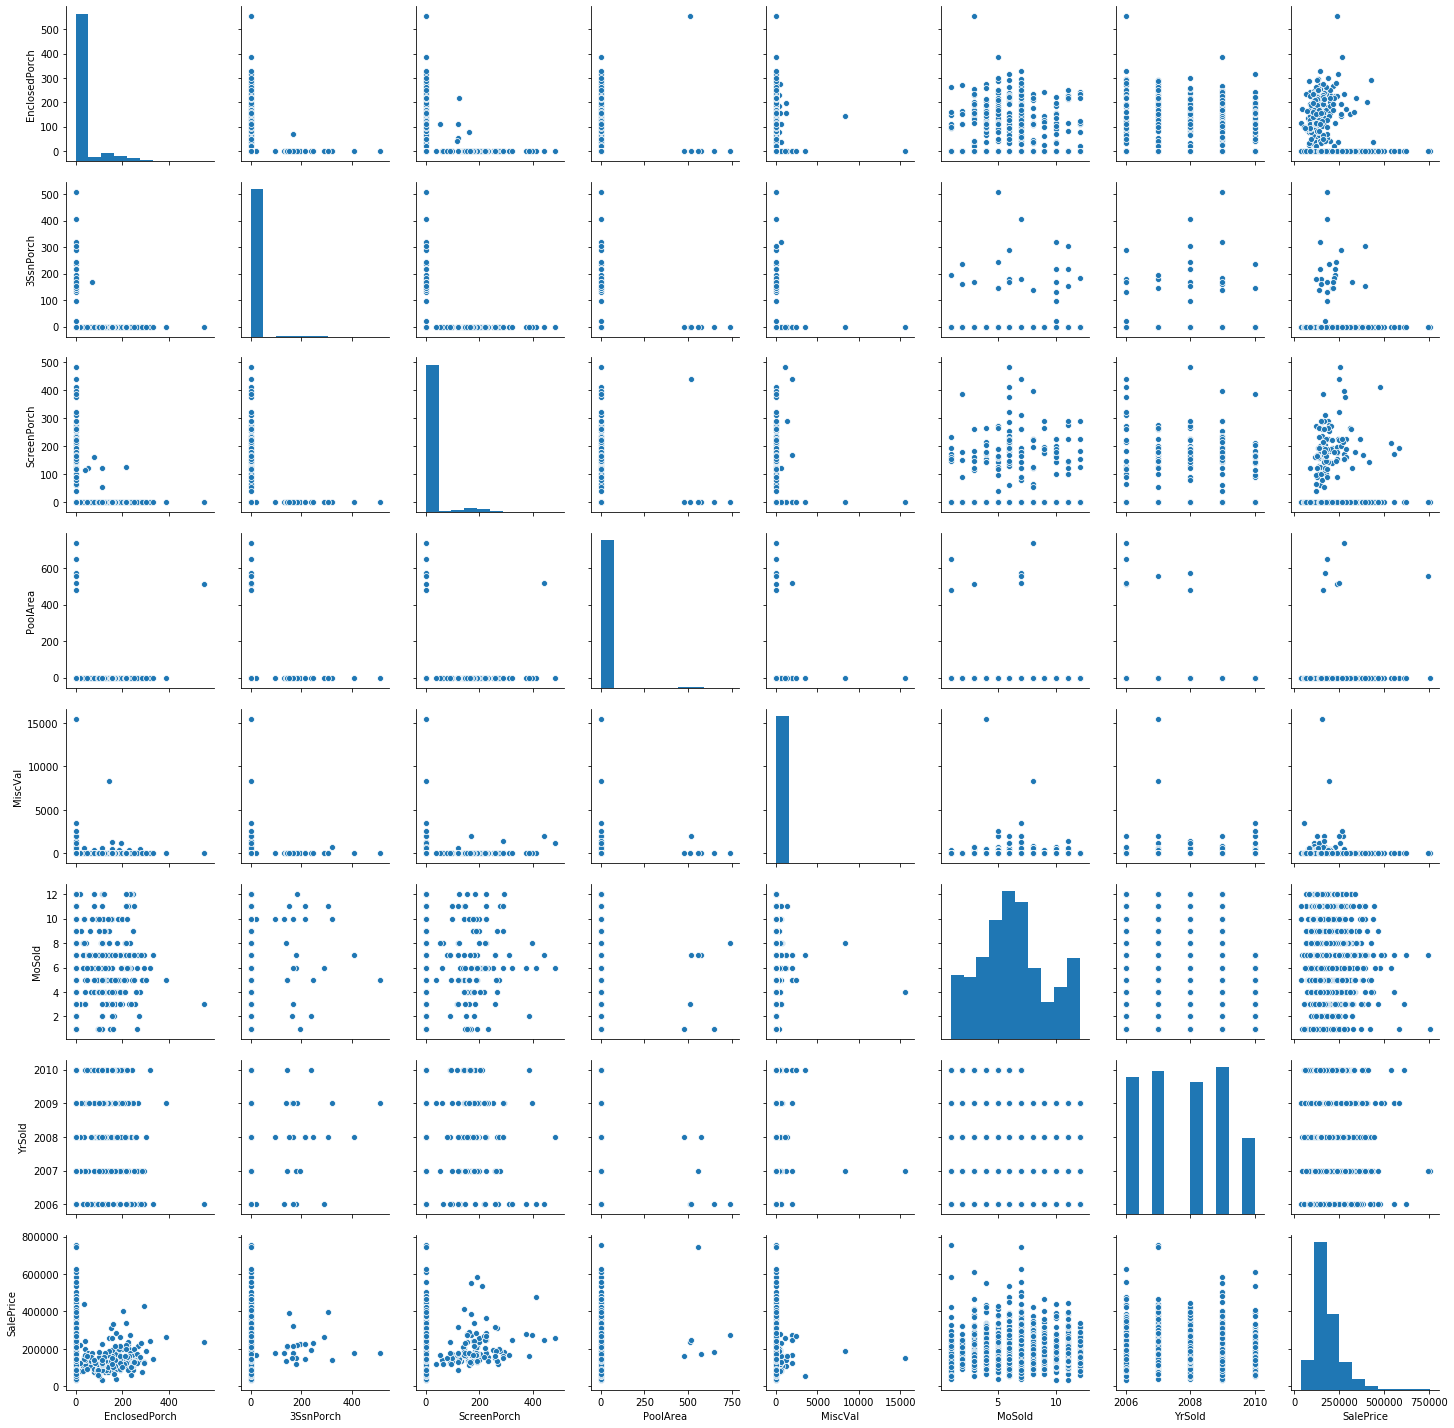

In [23]:
plt.figure(figsize=(30, 20))
sns.pairplot(housing_numeric_fourth_half)
plt.show()

In [24]:
housing_drop = ['YrSold', 'MiscVal', 'MoSold', 'PoolArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
'BedroomAbvGr', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF2', 'KitchenAbvGr',
'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'BsmtUnfSF']

In [25]:
housing = housing.drop(housing_drop, axis=1)

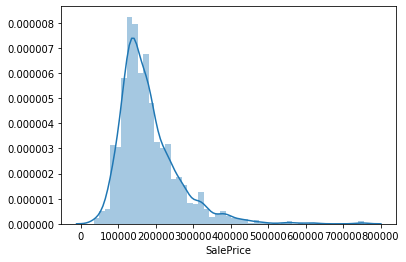

In [26]:
# Checking if target variable is normally distributed
sns.distplot(housing['SalePrice'])
plt.show()

In [27]:
# Treating skewness
salePrice_log = np.log(housing['SalePrice'])
salePrice_log.skew()

0.12133506220520406

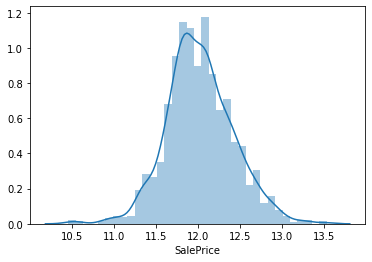

In [28]:
sns.distplot(salePrice_log)
plt.show()

In [29]:
# Poping out dependent variable
# Dividing data into X and y variables
housing_y = housing.pop('SalePrice')
housing_X = housing
housing_y[1]

208500

In [30]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing_X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_Feature,WD,Normal
2,RL,Pave,No_alley_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_Feature,WD,Normal
3,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_Feature,WD,Normal
4,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No_Pool,No_Fence,No_Feature,WD,Abnorml
5,RL,Pave,No_alley_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_Feature,WD,Normal


In [31]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,1,0,0,

In [32]:
# drop categorical variables 
housing_X = housing_X.drop(list(housing_categorical.columns), axis=1)

In [33]:
# concat dummy variables with X
housing_X = pd.concat([housing_X, housing_dummies], axis=1)
housing_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,1,0,0,

In [34]:
# working with YearBuilt
housing_X['Current'] = 2020

In [35]:
housing_X.Current.dtype

dtype('int64')

In [36]:
housing_X['House_Age'] = housing_X['Current'] - housing_X['YearBuilt']

In [37]:
# so we converted
housing_X['House_Age'] 

Id
1        17
2        44
3        19
4       105
5        20
       ... 
1456     21
1457     42
1458     79
1459     70
1460     55
Name: House_Age, Length: 1460, dtype: int64

In [38]:
# Dropping two recently created
housing_X = housing_X.drop(['Current'], axis=1)
housing_X = housing_X.drop(['YearBuilt'], axis=1)

In [39]:
housing_new = pd.concat([housing_X, housing_y], axis=1)
housing_new

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Age,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [40]:
housing_new = housing_new.reset_index()

In [41]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = housing_new.columns
housing_new = pd.DataFrame(scale(housing_new))
housing_new.columns = cols
housing_new.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'House_Age', 'SalePrice'],
      dtype='object', length=240)

In [42]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
housing_new_train, housing_new_test = train_test_split(housing_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
# Rescaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [44]:
housing.select_dtypes(include=['int64', 'float64']).columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'],
      dtype='object')

In [45]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'House_Age']

housing_new_train[num_vars] = scaler.fit_transform(housing_new_train[num_vars])

housing_new_train.head()
housing_new_train = housing_new_train.drop(['Id'], "columns")
# housing_new_train = housing_new_train.drop(column[], "columns")
housing_new_train

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Age,SalePrice
210,0.157534,0.019306,0.00000,0.082920,0.141408,0.113889,0.000000,0.0818

In [46]:
# Scaling test data
housing_new_test[num_vars] = scaler.transform(housing_new_test[num_vars])
housing_new_test = housing_new_test.drop(['Id'], "columns")

housing_new_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Age,SalePrice
1436,0.133562,0.035192,0.00000,0.109142,0.141408,0.113889,0.000000,0.081

In [47]:
# Dividing into X and Y sets for the model building
y_train = housing_new_train.pop('SalePrice')
X_train = housing_new_train

y_test = housing_new_test.pop('SalePrice')
X_test = housing_new_test

In [48]:
# Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 7),
 ('EnclosedPorch', False, 12),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 17),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 6),
 ('MSZoning_RL', False, 2),
 ('MSZoning_RM', False, 3),
 ('Street_Pave', False, 138),
 ('Alley_No_alley_access', False, 174),
 ('Alley_Pave', False, 189),
 ('LotShape_IR2', False, 198),
 ('LotShape_IR3', False, 204),
 ('LotShape_Reg', False, 139),
 ('LandContour_HLS', False, 92),
 ('LandContour_Low', False, 144),
 ('LandContour_Lvl', False, 84),
 ('Utilities_NoSeWa', False, 169),
 ('LotConfig_CulDSac', False, 57),
 ('LotConfig_FR2', False, 95),
 ('LotConfig_FR3', False, 199),
 ('LotConfig_Inside', False, 151),
 ('LandSlope_Mod', False, 168),
 ('LandSlope_Sev', False, 27),

In [50]:
# print(rfe.ranking_)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns)))

Features sorted by their rank:
[(1, '1stFlrSF'), (1, '2ndFlrSF'), (1, '3SsnPorch'), (1, 'BldgType_Duplex'), (1, 'BsmtExposure_Gd'), (1, 'BsmtFinSF1'), (1, 'BsmtQual_Gd'), (1, 'BsmtQual_TA'), (1, 'Condition2_PosN'), (1, 'ExterCond_Fa'), (1, 'ExterCond_Gd'), (1, 'ExterCond_TA'), (1, 'ExterQual_Gd'), (1, 'ExterQual_TA'), (1, 'Functional_Typ'), (1, 'GarageArea'), (1, 'GrLivArea'), (1, 'House_Age'), (1, 'KitchenQual_Fa'), (1, 'KitchenQual_Gd'), (1, 'KitchenQual_TA'), (1, 'LotArea'), (1, 'LotFrontage'), (1, 'MSZoning_FV'), (1, 'MasVnrArea'), (1, 'Neighborhood_Crawfor'), (1, 'Neighborhood_NoRidge'), (1, 'PoolQC_Gd'), (1, 'TotalBsmtSF'), (1, 'WoodDeckSF'), (2, 'MSZoning_RL'), (3, 'MSZoning_RM'), (4, 'SaleType_New'), (5, 'BsmtQual_Fa'), (6, 'MSZoning_RH'), (7, 'OpenPorchSF'), (8, 'PoolQC_No_Pool'), (9, 'RoofMatl_WdShngl'), (10, 'Functional_Min1'), (11, 'Functional_Min2'), (12, 'EnclosedPorch'), (13, 'Exterior1st_BrkFace'), (14, 'Condition1_Norm'), (15, 'BldgType_2fmCon'), (16, 'BsmtExposure_No'

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       '3SsnPorch', 'MSZoning_FV', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Condition2_PosN', 'BldgType_Duplex',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_TA', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Typ',
       'PoolQC_Gd', 'House_Age'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_No_alley_access',
       'Alley_Pave', 'LotShape_IR2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=208)

In [53]:
import statsmodels.api as sm
housing_X_train_rfe = X_train[col]
X_test = X_test[col]

In [54]:
# Ridge and Lasso Regression
# Ridge Regression

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(housing_X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
# for 25 total variables after rfe, if alpha is 0.9 then mse is increased
# whereas if 30 variables then mse is slightly decreased
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.4}
-0.2444439387009381


In [56]:
# Predicting in Train and Test Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
pred_train_ridge= model_cv.predict(housing_X_train_rfe)
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print(r2_score(y_train, pred_train_ridge))
print('Prediction on Test data')
pred_test_ridge= model_cv.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print(r2_score(y_test, pred_test_ridge))

0.31465372842099215
0.9000848061901586
Prediction on Test data
0.7968969221364595
0.37764827703943493


In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002632,0.000832,0.000932,0.000175,0.0001,{'alpha': 0.0001},-0.223065,-0.277977,-0.273319,-0.235890,-0.217585,-0.245545,0.025309,14,-0.227127,-0.221332,-0.219406,-0.221996,-0.224286,-0.222829,0.002655
1,0.002516,0.000879,0.000958,0.000196,0.001,{'alpha': 0.001},-0.223093,-0.277981,-0.273340,-0.235848,-0.217489,-0.245528,0.025335,13,-0.227128,-0.221336,-0.219402,-0.222003,-0.224324,-0.222839,0.002660
2,0.002678,0.000456,0.001189,0.000206,0.01,{'alpha': 0.01},-0.223295,-0.278022,-0.273490,-0.235511,-0.216768,-0.245395,0.025529,12,-0.227136,-0.221367,-0.219362,-0.222059,-0.224615,-0.222908,0.002700
3,0.002120,0.000503,0.000954,0.000243,0.05,{'alpha': 0.05},-0.223623,-0.277980,-0.273625,-0.234778,-0.215582,-0.245096,0.025818,11,-0.227147,-0.221392,-0.219259,-0.222137,-0.225086,-0.223004,0.002788
4,0.002087,0.000513,0.000750,0.000019,0.1,{'alpha': 0.1},-0.223746,-0.277775,-0.273573,-0.234343,-0.215179,-0.244902,0.025862,10,-0.227165,-0.221339,-0.219186,-0.222092,-0.225248,-0.223006,0.002847


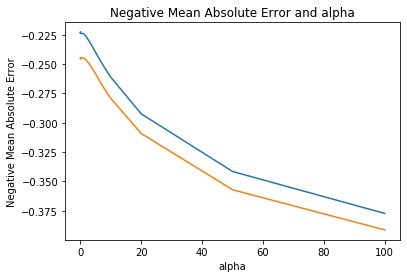

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
# plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [59]:
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(housing_X_train_rfe, y_train)
ridge.coef_

array([ 0.50649314,  1.05842783,  0.27503664,  1.0914251 ,  2.07823661,
        1.97738099,  1.01807435,  1.56775402,  0.49058317,  0.20705249,
        0.11718779,  0.02991687,  0.07612898,  0.0721961 , -0.20902802,
       -0.09573344, -0.10163551, -0.16146563, -0.11165758, -0.2174018 ,
       -0.23702612, -0.16347046, -0.15100371,  0.09660211, -0.12793535,
       -0.27975175, -0.34164766,  0.08096262, -0.40617151, -0.78749732])

In [60]:
ridge_df = pd.DataFrame(housing_X_train_rfe.columns)
ridge_df['Coefficient Estimate'] = pd.Series(ridge.coef_)
ridge_df

,0,Coefficient Estimate
0,LotFrontage,0.506493
1,LotArea,1.058428
2,MasVnrArea,0.275037
3,BsmtFinSF1,1.091425
4,TotalBsmtSF,2.078237
5,1stFlrSF,1.977381
6,2ndFlrSF,1.018074
7,GrLivArea,1.567754
8,GarageArea,0.490583
9,WoodDeckSF,0.207052


In [61]:
# if we doubled the lambda, the following features beta values decreases
alpha_new = alpha*2
ridge = Ridge(alpha=alpha_new)

ridge.fit(housing_X_train_rfe, y_train)
ridge.coef_

array([ 0.52702197,  0.9484856 ,  0.29396236,  1.0532051 ,  1.87560306,
        1.84856252,  0.93771922,  1.66275385,  0.5220217 ,  0.21961986,
        0.1145735 ,  0.02851107,  0.07744382,  0.07543718, -0.20542853,
       -0.0951805 , -0.10381555, -0.16740375, -0.1083014 , -0.20885627,
       -0.22706228, -0.15896933, -0.14740229,  0.10068196, -0.13168353,
       -0.28659453, -0.35045452,  0.08048666, -0.39640157, -0.77788429])

In [62]:
ridge_df = pd.DataFrame(housing_X_train_rfe.columns)
ridge_df['Coefficient Estimate'] = pd.Series(ridge.coef_)
ridge_df

,0,Coefficient Estimate
0,LotFrontage,0.527022
1,LotArea,0.948486
2,MasVnrArea,0.293962
3,BsmtFinSF1,1.053205
4,TotalBsmtSF,1.875603
5,1stFlrSF,1.848563
6,2ndFlrSF,0.937719
7,GrLivArea,1.662754
8,GarageArea,0.522022
9,WoodDeckSF,0.219620


In [63]:
# Lasso

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(housing_X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
# you should see the optimal value of alpha is 0.0001
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.24509327845737133


In [65]:
# Predictions on Train and Test data for Lasso
pred_train_lasso= model_cv.predict(housing_X_train_rfe)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_ridge))
print('Prediction on Test data')
pred_test_lasso= model_cv.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_ridge))

0.3134769989708255
0.9000848061901586
Prediction on Test data
0.8108752524819688
0.37764827703943493


In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009004,0.001875,0.001201,0.000392,0.0001,{'alpha': 0.0001},-0.223170,-0.278105,-0.273538,-0.234348,-0.216414,-0.245093,0.025755,1,-0.227188,-0.221371,-0.219318,-0.222286,-0.225027,-0.223038,0.002770
1,0.007854,0.000809,0.000876,0.000080,0.001,{'alpha': 0.001},-0.223346,-0.278275,-0.277997,-0.234962,-0.220534,-0.247000,0.025858,2,-0.228462,-0.222730,-0.220731,-0.223519,-0.226150,-0.224319,0.002704
2,0.002655,0.000275,0.000867,0.000115,0.01,{'alpha': 0.01},-0.267969,-0.291835,-0.313253,-0.280579,-0.262948,-0.283302,0.018035,3,-0.272852,-0.266509,-0.259524,-0.262718,-0.271448,-0.266610,0.005055
3,0.002642,0.000712,0.000834,0.000038,0.05,{'alpha': 0.05},-0.449560,-0.462065,-0.485244,-0.416821,-0.465440,-0.455820,0.022606,4,-0.451862,-0.450534,-0.441807,-0.446518,-0.448844,-0.447913,0.003537
4,0.001894,0.000018,0.000796,0.000002,0.1,{'alpha': 0.1},-0.480761,-0.496032,-0.508443,-0.447058,-0.503976,-0.487247,0.022187,5,-0.483171,-0.477272,-0.472931,-0.490194,-0.479332,-0.480580,0.005833


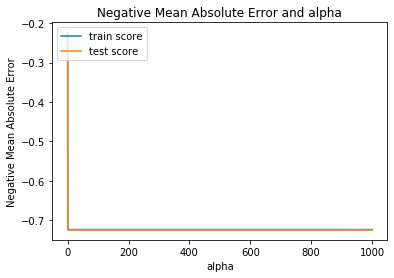

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(housing_X_train_rfe, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
lasso.coef_

array([ 0.46636536,  1.17027694,  0.2415088 ,  1.10319852,  2.36108751,
        3.31638554,  1.68961114,  0.        ,  0.44812158,  0.18767748,
        0.09820569,  0.03160578,  0.07455241,  0.06895968, -0.21266476,
       -0.09616161, -0.10100886, -0.15895114, -0.10644513, -0.21086286,
       -0.23062212, -0.16860553, -0.1552599 ,  0.09240791, -0.12349974,
       -0.27196072, -0.33141561,  0.08076143, -0.41596377, -0.78211123])

In [70]:
lasso_df = pd.DataFrame(housing_X_train_rfe.columns)
lasso_df['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_df

,0,Coefficient Estimate
0,LotFrontage,0.466365
1,LotArea,1.170277
2,MasVnrArea,0.241509
3,BsmtFinSF1,1.103199
4,TotalBsmtSF,2.361088
5,1stFlrSF,3.316386
6,2ndFlrSF,1.689611
7,GrLivArea,0.000000
8,GarageArea,0.448122
9,WoodDeckSF,0.187677


In [71]:
# if we doubled the lambda value, we see that the one with zero beta(coefficient) would be dropped out
alpha_new = alpha*2

lasso = Lasso(alpha=alpha_new)
        
lasso.fit(housing_X_train_rfe, y_train) 
lasso.coef_

array([ 0.45718093,  1.13218563,  0.23761021,  1.08947127,  2.33738873,
        3.32100621,  1.68466368,  0.        ,  0.45202974,  0.18528971,
        0.07514836,  0.03120228,  0.07460397,  0.06956396, -0.2118763 ,
       -0.09617564, -0.1011911 , -0.15977661, -0.10092096, -0.19848605,
       -0.21705136, -0.16773226, -0.15464382,  0.09341142, -0.12383241,
       -0.27238391, -0.33210644,  0.08078329, -0.41381306, -0.77943269])

In [72]:
lasso_df = pd.DataFrame(housing_X_train_rfe.columns)
lasso_df['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_df

,0,Coefficient Estimate
0,LotFrontage,0.457181
1,LotArea,1.132186
2,MasVnrArea,0.237610
3,BsmtFinSF1,1.089471
4,TotalBsmtSF,2.337389
5,1stFlrSF,3.321006
6,2ndFlrSF,1.684664
7,GrLivArea,0.000000
8,GarageArea,0.452030
9,WoodDeckSF,0.185290


In [73]:
# According to the lambda, one should choose Ridge Regularisation.
# Because if we look at the lambda value of Lasso its, 0.0001 which very less and according to the plot
# also one could infer that the resultant model is overfitting for Lasso, whereas, in case of Ridge lambda
# value is 0.5 making beta(coefficients) value very less, therefore escaping from penalising many variables.
# Also, the ridge regression model traded some variance for bias, which ultimately lead to an overall slightly
# less error (from (Lasso – 0.0348, Ridge – 0.0347)

In [74]:
# 1) Which variables are significant in predicting the price of a house

# the absolute values of coefficients value(beta value) which more are more significant than
# the others can be seen below
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(housing_X_train_rfe, y_train) 
lasso.coef_

lasso_df = pd.DataFrame(housing_X_train_rfe.columns)
lasso_df['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_df

,0,Coefficient Estimate
0,LotFrontage,0.466365
1,LotArea,1.170277
2,MasVnrArea,0.241509
3,BsmtFinSF1,1.103199
4,TotalBsmtSF,2.361088
5,1stFlrSF,3.316386
6,2ndFlrSF,1.689611
7,GrLivArea,0.000000
8,GarageArea,0.448122
9,WoodDeckSF,0.187677


In [75]:
# Subjective Ques - 3

In [76]:
alpha =0.0001
lasso = Lasso(alpha=alpha)       
lasso.fit(housing_X_train_rfe, y_train)
lasso_df = pd.DataFrame(housing_X_train_rfe.columns)
lasso_df['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_df

,0,Coefficient Estimate
0,LotFrontage,0.466365
1,LotArea,1.170277
2,MasVnrArea,0.241509
3,BsmtFinSF1,1.103199
4,TotalBsmtSF,2.361088
5,1stFlrSF,3.316386
6,2ndFlrSF,1.689611
7,GrLivArea,0.000000
8,GarageArea,0.448122
9,WoodDeckSF,0.187677


In [77]:
# Removing first five predictive variable

housing_new_train = housing_new_train.drop(['LotArea', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea'], "columns")
housing_new_train

,LotFrontage,MasVnrArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley_access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_Age
210,0.157534,0.00000,0.000000,0.000000,0.000000,0.173913,0.0,0.0,-0.215859,-0.105263,0.518133,-0.418955,0.064238,0.257821,-0.169981,-0.169981

In [78]:
X_train = housing_new_train
# Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [79]:
col = X_train.columns[rfe.support_]
housing_X_train_rfe = X_train[col]
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(housing_X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [83]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(housing_X_train_rfe, y_train) 
lasso_df = pd.DataFrame(housing_X_train_rfe.columns)
lasso_df['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_df

,0,Coefficient Estimate
0,LotFrontage,1.123914
1,MasVnrArea,0.843470
2,GarageArea,1.288022
3,WoodDeckSF,0.429192
4,OpenPorchSF,0.551066
5,EnclosedPorch,-0.065693
6,Neighborhood_Crawfor,0.106808
7,Neighborhood_NoRidge,0.150409
8,Condition2_PosN,-0.130638
9,RoofMatl_WdShngl,0.074796


In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
pred_train_ridge= model_cv.predict(housing_X_train_rfe)
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print(r2_score(y_train, pred_train_ridge))

0.4244273487509833
0.8182089524903429
